In [14]:
!rm -rf runs videos

## Environment Setup

In [ ]:
!pip install gym-tetris
!pip install tensorboardX
!pip install pyglet==1.5.1
!pip install torchsummary
!pip install optuna
!pip install optuna-dashboard

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.7/77.7 KB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.6 MB/s eta 0:00:00
  Created wheel for nes-py: filename=nes_py-8.2.1-cp39-cp39-linux_x86_64.whl size=494880 sha256=43c45a527244fe87c2c1d6755a3e067f8434f9390462d12c08057f829bcd0bbd
  Stored in directory: /root/.cache/pip/wheels/c6/e1/4b/dbbd5d4a46ad80c0149d5671edb272c728c130e4d5750ca1d2
Successfully built nes-py
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 7.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.8 MB/s eta 0:00:00
  Attempting uninstall: pyglet
    Found existing

In [ ]:
!pip install setuptools==65.5.1
!pip install gym==0.21.0
!pip install stable-baselines3[extra]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.6.1
    Uninstalling setuptools-67.6.1:
      Successfully uninstalled setuptools-67.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
cvxpy 1.3.1 requires setuptools>65.5.1, but you have setuptools 65.5.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 46.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ 

In [ ]:
!pip install pyvirtualdisplay
!apt-get install -y xvfb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 780 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 xvfb amd64 2:1.20.13-1ubuntu1~20.04.8 [780 kB]
Fetched 780 kB in 1s (1,093 kB/s)
Selecting previously unselected package xvfb.
(Reading database ... 128293 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.20.13-1ubuntu1~20.04.8_amd64.deb ...
Unpacking xvfb (2:1.20.13-1ubuntu1~20.04.8) ...
Setting up xvfb (2:1.20.13-1ubuntu1~20.04.8) ...
Processing tri

In [1]:
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1024, 768))
virtual_display.start()

In [2]:
import sys
import os

# Get the absolute path to the parent directory of gym-tetris
gym_tetris_parent_path = os.path.abspath(os.path.join('..', 'gym-tetris'))

# Append the path to the sys.path
sys.path.append(gym_tetris_parent_path)

## Tests

In [ ]:
from nes_py.wrappers import JoypadSpace
import gym_tetris
from gym_tetris.actions import MOVEMENT

env = gym_tetris.make('TetrisA-v0')
env = JoypadSpace(env, MOVEMENT)

print("action space: ", env.action_space.shape)
#print("observation space: ", env.observation_shape.shape)

done = True
for step in range(1):
    if done:
        state = env.reset()
    print(state.shape)
    state, reward, done, info = env.step(env.action_space.sample())
    print(info)
    env.render()

env.close()

action space:  ()
(240, 256, 3)
{'current_piece': 'Jd', 'number_of_lines': 0, 'score': 0, 'next_piece': 'Ih', 'statistics': {'T': 0, 'J': 1, 'Z': 0, 'O': 0, 'S': 0, 'L': 0, 'I': 0}, 'board_height': 0}


In [ ]:
from nes_py.wrappers import JoypadSpace
import gym_tetris
from gym_tetris.actions import MOVEMENT

envs = gym.vector.SyncVectorEnv([make_env(env_id="SpaceInvadersNoFrameskip-v4", seed=1, idx=0, capture_video=0, run_name="test")])

print("action space: ", envs.action_space.shape)
#print("observation space: ", env.observation_shape.shape)

done = True
for step in range(1):
    if done:
        state = envs.reset()
    print(state.shape)
    state, reward, done, info = envs.step(envs.action_space.sample())
    print(info)
    #envs.render()

envs.close()

action space:  None
(1, 4, 84, 84)
[{'lives': 3, 'episode_frame_number': 3, 'frame_number': 3}]


In [ ]:
envs = gym.vector.SyncVectorEnv([make_env(env_id="TetrisA-v0", seed=1, idx=0, capture_video=0, run_name="test")])
print("action space: ", envs.action_space)
print("observation space: ", envs.observation_space)
print("single action space: ", envs.single_action_space)
print("single observation space: ", envs.single_observation_space)

In [ ]:
envs = gym.vector.SyncVectorEnv([make_env(env_id="SpaceInvadersNoFrameskip-v4", seed=1, idx=0, capture_video=0, run_name="test")])
print("action space: ", envs.action_space)
print("observation space: ", envs.observation_space.shape)
print("single action space: ", envs.single_action_space)
#print("single observation space: ", envs.single_observation_space)

action space:  Tuple(Discrete(6))
observation space:  (1, 4, 84, 84)
single action space:  Discrete(6)


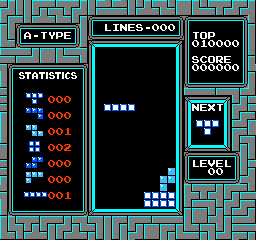

KeyboardInterrupt: ignored

In [ ]:
import io
import time
import IPython.display
from PIL import Image
from nes_py.wrappers import JoypadSpace
import gym_tetris
from gym_tetris.actions import MOVEMENT

env = gym_tetris.make('TetrisA-v0')
env = JoypadSpace(env, MOVEMENT)

done = True
for step in range(5000):
    if done:
        state = env.reset()
    state, reward, done, info = env.step(env.action_space.sample())

    # Capture the current game frame
    buffer = io.BytesIO()
    img = env.render(mode='rgb_array')
    Image.fromarray(img).save(buffer, 'PNG')
    buffer.seek(0)

    # Display the frame using IPython.display
    IPython.display.clear_output(wait=True)
    IPython.display.display(Image.open(buffer))

    # Sleep for a short duration (optional, to control the frame rate)
    #time.sleep(0.1)

IPython.display.clear_output(wait=True)
env.close()

## Training

In [3]:
import os
import random
import time
from distutils.util import strtobool

import gym
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from stable_baselines3.common.atari_wrappers import (
    ClipRewardEnv,
    EpisodicLifeEnv,
    FireResetEnv,
    MaxAndSkipEnv,
    NoopResetEnv,
)
from stable_baselines3.common.buffers import ReplayBuffer
from torch.utils.tensorboard import SummaryWriter

from nes_py.wrappers import JoypadSpace
import gym_tetris
from gym_tetris.actions import MOVEMENT

from torchsummary import summary

In [21]:
import importlib
importlib.reload(gym_tetris)
importlib.reload(gym_tetris.actions)

<module 'gym_tetris.actions' from '/Users/itaibear/Tetris/AtariGameMaster/gym-tetris/gym_tetris/actions.py'>

In [4]:
class QNetwork(nn.Module):
    def __init__(self, actions_num, arch_fn):
        super().__init__()
        self.network = arch_fn(actions_num)

    def forward(self, x):
        return self.network(x / 255.0)

def original(actions_num):
    network = nn.Sequential(
        nn.Conv2d(1, 32, 8, stride=4),
        nn.ReLU(),
        nn.Conv2d(32, 64, 4, stride=2),
        nn.ReLU(),
        nn.Conv2d(64, 64, 3, stride=1),
        nn.ReLU(),
        nn.Flatten(),
        nn.Dropout(0.2),
        nn.Linear(3136, 512),
        nn.Dropout(0.2),
        nn.ReLU(),
        nn.Linear(512, actions_num),
    )
    return network

def tiny(actions_num):
    network = nn.Sequential(
        nn.Conv2d(1, 8, 3, stride=1),
        nn.ReLU(),
        nn.Conv2d(8, 16, 5, stride=3),
        nn.ReLU(),
        nn.Conv2d(16, 32, 5, stride=3),
        nn.ReLU(),
        nn.Flatten(),
        nn.Linear(2048, 128),
        nn.Dropout(0.1),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.Dropout(0.5),
        nn.ReLU(),
        nn.Linear(64, actions_num),
    )
    return network

def small(actions_num):
    network = nn.Sequential(
        # (1, 84, 84)
        nn.Conv2d(1, 64, 7, stride=3),
        nn.ReLU(),
        # (64, 26, 26)
        nn.Conv2d(64, 128, 5),
        nn.ReLU(),
        # (128, 22, 22)
        nn.MaxPool2d(2),
        # (128, 11, 11)
        nn.Conv2d(128, 128, 3),
        nn.ReLU(),
        # (128, 8, 8)
        nn.Conv2d(128, 256, 3),
        nn.ReLU(),
        # (256, 6, 6)
        nn.Conv2d(256, 256, 3),
        nn.ReLU(),
        # (256, 4, 4)
        nn.MaxPool2d(2),
        # (256, 2, 2)
        nn.Flatten(),
        # 1024
        nn.Dropout(0.5),
        nn.Linear(1024, 256),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(256, actions_num)
        # 12 possible actions
    )
    return network

def get_model_class(architecture="original"):
    if architecture == "original":
        class OriginalQNetwork(QNetwork):
            def __init__(self, env):
                super().__init__(env, original)
        return OriginalQNetwork
    elif architecture == "tiny":
        class TinyQNetwork(QNetwork):
            def __init__(self, env):
                super().__init__(env, tiny)
        return TinyQNetwork
    elif architecture == "small":
        class SmallQNetwork(QNetwork):
            def __init__(self, env):
                super().__init__(env, small)
        return SmallQNetwork
    else:
        print("Not a valid architecture")

def linear_schedule(start_e: float, end_e: float, duration: int, t: int):
    slope = (end_e - start_e) / duration
    return max(slope * t + start_e, end_e)

In [ ]:
Network = get_model_class("small")
model = Network(12)
summary(model, (1, 84, 84), batch_size=16, device="cpu")
x = torch.randn(1, 84, 84)
out = model(x)

### Noam Networks

In [ ]:
# # Network V2 - Noam
# class QNetwork(nn.Module):
#     def __init__(self, env):
#         super().__init__()
#         self.network = nn.Sequential(
#             # (1, 84, 84)
#             nn.Conv2d(1, 32, 8, padding='same'),
#             nn.MaxPool2d(3),
#             nn.ReLU(),
#             # (32, 28, 28)
#             nn.Conv2d(32, 64, 4, padding='same'),
#             nn.MaxPool2d(2),
#             nn.ReLU(),
#             # (64, 14, 14)
#             nn.Conv2d(64, 64, 3, padding='same'),
#             nn.ReLU(),
#             nn.MaxPool2d(2),
#             # (64, 7, 7)
#             nn.Flatten(),
#             # 3136
#             nn.Dropout(0.5),
#             nn.Linear(3136, 1024),
#             nn.ReLU(),
#             # 1024
#             nn.Dropout(0.4),
#             nn.Linear(1024, 256),
#             nn.ReLU(),
#             # 256
#             nn.Dropout(0.3),
#             nn.Linear(256, env.single_action_space.n)
#             # 12 possible actions
#         )

#     def forward(self, x):
#         return self.network(x / 255.0)


# def linear_schedule(start_e: float, end_e: float, duration: int, t: int):
#     slope = (end_e - start_e) / duration
#     return max(slope * t + start_e, end_e)

In [ ]:
# # Network V3 - Noam
# class QNetwork(nn.Module):
#     def __init__(self, env):
#         super().__init__()
#         self.network = nn.Sequential(
#             # (1, 84, 84)
#             nn.Conv2d(1, 64, 4, padding='valid'),
#             nn.MaxPool2d(3),
#             nn.ReLU(),
#             # (64, 27, 27)
#             nn.Conv2d(64, 128, 4, padding='valid'),
#             # (64, 24, 24)
#             nn.MaxPool2d(3),
#             nn.ReLU(),
#             # (128, 8, 8)
#             nn.Conv2d(128, 128, 3, padding='valid'),
#             nn.ReLU(),
#             nn.MaxPool2d(2),
#             # (128, 3, 3)
#             nn.Flatten(),
#             # 1152
#             nn.Dropout(0.5),
#             nn.Linear(1152, 256),
#             nn.ReLU(),
#             nn.Dropout(0.3),
#             nn.Linear(256, env.single_action_space.n)
#             # 12 possible actions
#         )

#     def forward(self, x):
#         return self.network(x / 255.0)


# def linear_schedule(start_e: float, end_e: float, duration: int, t: int):
#     slope = (end_e - start_e) / duration
#     return max(slope * t + start_e, end_e)

In [ ]:
# # Network V4 - Noam
# class QNetwork(nn.Module):
#     def __init__(self, env):
#         super().__init__()
#         self.network = nn.Sequential(
#             # (1, 84, 84)
#             nn.Conv2d(1, 64, 5, padding='valid'),
#             # (64, 80, 80)
#             nn.MaxPool2d(2),
#             nn.ReLU(),
#             # (64, 40, 40)
#             nn.Conv2d(64, 128, 5, padding='valid'),
#             nn.MaxPool2d(2),
#             nn.ReLU(),
#             # (128, 18, 18)
#             nn.Conv2d(128, 128, 3, padding='valid'),
#             nn.ReLU(),
#             nn.MaxPool2d(2),
#             # (128, 8, 8)
#             nn.Conv2d(128, 128, 3, padding='same'),
#             nn.ReLU(),
#             nn.MaxPool2d(2),
#             # (128, 4, 4)
#             nn.Flatten(),
#             # 2048
#             nn.Dropout(0.5),
#             nn.Linear(2048, 512),
#             nn.ReLU(),
#             nn.Dropout(0.3),
#             nn.Linear(512, env.single_action_space.n)
#             # 12 possible actions
#         )

#     def forward(self, x):
#         return self.network(x / 255.0)


# def linear_schedule(start_e: float, end_e: float, duration: int, t: int):
#     slope = (end_e - start_e) / duration
#     return max(slope * t + start_e, end_e)

In [ ]:
# # Network V5 - Noam
# class QNetwork(nn.Module):
#     def __init__(self, env):
#         super().__init__()
#         self.network = nn.Sequential(
#             # (1, 84, 84)
#             nn.Conv2d(1, 64, 7, stride=3),
#             nn.ReLU(),
#             # (64, 26, 26)
#             nn.Conv2d(64, 128, 5),
#             nn.ReLU(),
#             # (128, 22, 22)
#             nn.MaxPool2d(2),
#             # (128, 11, 11)
#             nn.Conv2d(128, 128, 3),
#             nn.ReLU(),
#             # (128, 8, 8)
#             nn.Conv2d(128, 256, 3),
#             nn.ReLU(),
#             # (256, 6, 6)
#             nn.Conv2d(256, 256, 3),
#             nn.ReLU(),
#             # (256, 4, 4)
#             nn.MaxPool2d(2),
#             # (256, 2, 2)
#             nn.Flatten(),
#             # 1024
#             nn.Dropout(0.5),
#             nn.Linear(1024, 256),
#             nn.ReLU(),
#             nn.Dropout(0.2),
#             nn.Linear(256, env.single_action_space.n)
#             # 12 possible actions
#         )

#     def forward(self, x):
#         return self.network(x / 255.0)


# def linear_schedule(start_e: float, end_e: float, duration: int, t: int):
#     slope = (end_e - start_e) / duration
#     return max(slope * t + start_e, end_e)

### training

In [5]:
def train(args, trial=None):
  try:
    run_name = f"{args.env_id}__{args.exp_name}__{args.seed}__{int(time.time())}"
    prefix = ""
    if trial:
      run_name += f"_trial_{trial.number}"
      prefix = f"trial {trial.number}: "
    if args.track:
        import wandb

        wandb.init(
            project=args.wandb_project_name,
            entity=args.wandb_entity,
            sync_tensorboard=True,
            config=vars(args),
            name=run_name,
            monitor_gym=True,
            save_code=True,
        )
    writer = SummaryWriter(f"runs/{run_name}")
    writer.add_text(
        "hyperparameters",
        "|param|value|\n|-|-|\n%s" % ("\n".join([f"|{key}|{value}|" for key, value in vars(args).items()])),
    )

    # TRY NOT TO MODIFY: seeding
    random.seed(args.seed)
    np.random.seed(args.seed)
    torch.manual_seed(args.seed)
    torch.backends.cudnn.deterministic = args.torch_deterministic

    device_name = "cuda" if torch.cuda.is_available() and args.cuda else "cpu"
    device_name = "mps" if torch.backends.mps.is_available() and args.mps else device_name
    device = torch.device(device_name)

    # env setup
    env_fns = [make_env(args.env_id, args.seed, i, args.capture_video, run_name, args.video_frequency) for i in range(args.env_cnt)]
    envs = gym.vector.SyncVectorEnv(env_fns)
    assert isinstance(envs.single_action_space, gym.spaces.Discrete), "only discrete action space is supported"

    q_network = args.QNetwork(envs.single_action_space.n).to(device)
    optimizer = optim.Adam(q_network.parameters(), lr=args.learning_rate)
    target_network = args.QNetwork(envs.single_action_space.n).to(device)
    target_network.load_state_dict(q_network.state_dict())

    #summary(q_network, input_size=(1, 84, 84), batch_size=args.batch_size, device=device_name)

    rb = ReplayBuffer(
        args.buffer_size,
        envs.single_observation_space,
        envs.single_action_space,
        device,
        n_envs=args.env_cnt,
        optimize_memory_usage=False,
        handle_timeout_termination=True,
    )
    start_time = time.time()
    eval_idx = 1

    # TRY NOT TO MODIFY: start the game
    obs = envs.reset()
    for global_step in range(args.total_timesteps):
        # ALGO LOGIC: put action logic here
        epsilon = linear_schedule(args.start_e, args.end_e, args.exploration_fraction * args.total_timesteps, global_step)
        if random.random() < epsilon:
            actions = np.array([envs.single_action_space.sample() for _ in range(envs.num_envs)])
        else:
            q_values = q_network(torch.Tensor(obs).to(device))
            actions = torch.argmax(q_values, dim=1).cpu().numpy()

        # TRY NOT TO MODIFY: execute the game and log data.
        next_obs, rewards, dones, infos = envs.step(actions)

        # TRY NOT TO MODIFY: record rewards for plotting purposes
        for info in infos:
            if "episode" in info.keys():
                print(f"{prefix}global_step={global_step}, episodic_return={info['episode']['r']}")
                writer.add_scalar("charts/episodic_return", info["episode"]["r"], global_step)
                writer.add_scalar("charts/episodic_length", info["episode"]["l"], global_step)
                writer.add_scalar("charts/epsilon", epsilon, global_step)


            # Evaluate and report the agent periodically
            if trial and global_step % args.eval_frequency == 0 and global_step > 0:
                episodic_returns = evaluate(q_network, make_env, args.env_id, args.eval_episodes, f"{run_name}-eval-{eval_idx}", args.QNetwork, device, args.eval_epsilon, capture_video=False)
                mean_return = np.mean(episodic_returns)
                print(f"{prefix}evaluation_{eval_idx}_mean_return={mean_return}")
                trial.report(mean_return, global_step)
                eval_idx += 1

                # Check if the trial should be pruned
                if trial and trial.should_prune():
                    raise optuna.exceptions.TrialPruned()
                break

        # TRY NOT TO MODIFY: save data to reply buffer; handle `terminal_observation`
        real_next_obs = next_obs.copy()
        #for idx, d in enumerate(dones):
            #if d:
                #real_next_obs[idx] = infos[idx]["terminal_observation"]  //Tetris environment does not set a terminal observation.
        rb.add(obs, real_next_obs, actions, rewards, dones, infos)

        # TRY NOT TO MODIFY: CRUCIAL step easy to overlook
        obs = next_obs

        # ALGO LOGIC: training.
        if global_step > args.learning_starts:
            if global_step % args.train_frequency == 0:
                data = rb.sample(args.batch_size)
                with torch.no_grad():
                    target_max, _ = target_network(data.next_observations).max(dim=1)
                    td_target = data.rewards.flatten() + args.gamma * target_max * (1 - data.dones.flatten())
                old_val = q_network(data.observations).gather(1, data.actions).squeeze()
                loss = F.mse_loss(td_target, old_val)

                if global_step % 100 == 0:
                    writer.add_scalar("losses/td_loss", loss, global_step)
                    writer.add_scalar("losses/q_values", old_val.mean().item(), global_step)
                    # print("SPS:", int(global_step / (time.time() - start_time)))    # steps per second
                    writer.add_scalar("charts/SPS", int(global_step / (time.time() - start_time)), global_step)

                # optimize the model
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            # update target network
            if global_step % args.target_network_frequency == 0:
                for target_network_param, q_network_param in zip(target_network.parameters(), q_network.parameters()):
                    target_network_param.data.copy_(
                        args.tau * q_network_param.data + (1.0 - args.tau) * target_network_param.data
                    )

    if args.save_model:
        model_path = f"runs/{run_name}/{args.exp_name}.cleanrl_model"
        torch.save(q_network.state_dict(), model_path)
        print(f"{prefix}model saved to {model_path}")

        episodic_returns = evaluate(
            model_path,
            make_env,
            args.env_id,
            args.eval_episodes,
            run_name=f"{run_name}-eval-{eval_idx}",
            Model=args.QNetwork,
            device=device,
            epsilon=args.eval_epsilon,
            capture_video=args.capture_video
        )
        if trial:
          mean_return = np.mean(episodic_returns)
          print(f"{prefix}evaluation_{eval_idx}_mean_return={mean_return}")
          trial.set_user_attr("mean_return", float(mean_return))
        for idx, episodic_return in enumerate(episodic_returns):
            writer.add_scalar("eval/episodic_return", episodic_return, idx)

        if args.upload_model:
            pass
            from cleanrl_utils.huggingface import push_to_hub

            repo_name = f"{args.env_id}-{args.exp_name}-seed{args.seed}"
            repo_id = f"{args.hf_entity}/{repo_name}" if args.hf_entity else repo_name
            push_to_hub(args, episodic_returns, repo_id, "DQN", f"runs/{run_name}", f"videos/{run_name}-eval")
  except:
    raise
  finally:
    envs.close()
    writer.close()

In [9]:
def make_env(env_id, seed, idx, capture_video, run_name, video_freq=100):
    def thunk():
        env = gym_tetris.make(env_id)
        env = JoypadSpace(env, MOVEMENT)
        env = gym.wrappers.RecordEpisodeStatistics(env)
        if capture_video:
            if idx == 0:
                env = gym.wrappers.RecordVideo(env, f"videos/{run_name}", episode_trigger=lambda ep_num: ep_num % video_freq == 0)
        #env = NoopResetEnv(env, noop_max=30)
        #env = MaxAndSkipEnv(env, skip=4)
        #env = EpisodicLifeEnv(env)
        #env = ClipRewardEnv(env)
        env = gym.wrappers.ResizeObservation(env, (84, 84))
        env = gym.wrappers.GrayScaleObservation(env)
        env = gym.wrappers.FrameStack(env, 1)
        env.seed(seed)
        env.action_space.seed(seed)
        env.observation_space.seed(seed)
        return env

    return thunk

### Cleanrl utils

In [10]:
from typing import Callable, Union

def evaluate(
    model_input: Union[str, torch.nn.Module],
    make_env: Callable,
    env_id: str,
    eval_episodes: int,
    run_name: str,
    Model: torch.nn.Module,
    device: torch.device = torch.device("cpu"),
    epsilon: float = 0.05,
    capture_video: bool = True,
):
    env_fns = [make_env(args.env_id, args.seed, i, args.capture_video, run_name, args.video_frequency) for i in range(args.env_cnt)]
    envs = gym.vector.SyncVectorEnv(env_fns)
    if isinstance(model_input, str):
        model = Model(envs.single_action_space.n).to(device)
        model.load_state_dict(torch.load(model_input, map_location=device))
    elif isinstance(model_input, torch.nn.Module):
        model = model_input
    else:
        raise ValueError("Invalid model_input. It should be either a path (str) or a model instance (torch.nn.Module).")
    model.eval()

    obs = envs.reset()
    episodic_returns = []
    while len(episodic_returns) < eval_episodes:
        #if random.random() < epsilon:
            #actions = np.array([envs.single_action_space.sample() for _ in range(envs.num_envs)])
        #else:
        q_values = model(torch.Tensor(obs).to(device))
        actions = torch.argmax(q_values, dim=1).cpu().numpy()
        next_obs, _, _, infos = envs.step(actions)
        for info in infos:
            if "episode" in info.keys():
                print(f"eval_episode={len(episodic_returns)}, episodic_return={info['episode']['r']}")
                episodic_returns += [info["episode"]["r"]]
        obs = next_obs
    envs.close()
    return episodic_returns

## main

In [ ]:
# # Short Run
# class Args:
#     def __init__(self):
#         self.env_id = "TetrisA-v0"
#         self.exp_name = "dqn"
#         self.seed = 1
#         self.torch_deterministic = True
#         self.cuda = True
#         self.mps = False
#         self.track = False
#         self.wandb_project_name = "cleanRL"
#         self.wandb_entity = None
#         self.capture_video = True
#         self.save_model = True
#         self.upload_model = False
#         self.hf_entity = ""
#         self.total_timesteps = 20000
#         self.video_frequency = 100
#         self.env_cnt = 2

#         # evaluations
#         self.total_evaluations = 2
#         self.eval_episodes = 4
#         self.eval_frequency = int(self.total_timesteps / self.total_evaluations)
#         self.eval_epsilon = 0.05

#         # Trainable hyperparameters
#         self.QNetwork = None
#         self.learning_rate = None
#         self.buffer_size = None
#         self.gamma = None
#         self.tau = None
#         self.target_network_frequency = None
#         self.batch_size = None
#         self.start_e = None
#         self.end_e = None
#         self.exploration_fraction = None
#         self.learning_starts = None
#         self.train_frequency = None

# args = Args()

In [13]:
#Weeklong args
class Args:
    def __init__(self):
        self.exp_name = "Tetris_DQN"
        self.seed = 1
        self.torch_deterministic = True
        self.cuda = False
        self.mps = True
        self.track = False
        self.wandb_project_name = "cleanRL"
        self.wandb_entity = None
        self.capture_video = True
        self.save_model = True
        self.upload_model = False
        self.hf_entity = ""
        self.env_id = "TetrisA-v4"
        self.total_timesteps = 100000
        self.learning_rate = 1e-4
        self.buffer_size = 100000
        self.gamma = 0.99
        self.tau = 1.0
        self.target_network_frequency = 1000
        self.batch_size = 32
        self.start_e = 1
        self.end_e = 0.01
        self.exploration_fraction = 0.10
        self.learning_starts = 50000
        self.train_frequency = 4
        self.video_frequency = 10
        self.env_cnt = 1
        self.QNetwork = get_model_class("tiny")

        # evaluations
        self.total_evaluations = 2
        self.eval_episodes = 4
        self.eval_frequency = int(self.total_timesteps / self.total_evaluations)
        self.eval_epsilon = 0.05

args = Args()

In [12]:
train(args)

global_step=6240, episodic_return=-43.0
global_step=15034, episodic_return=62.0
global_step=21220, episodic_return=-168.0
global_step=27192, episodic_return=79.0
global_step=34031, episodic_return=-81.0
global_step=43414, episodic_return=164.0
global_step=48984, episodic_return=-73.0
global_step=59084, episodic_return=-126.0
global_step=68264, episodic_return=152.0
global_step=75318, episodic_return=95.0
global_step=80150, episodic_return=-76.0
global_step=83438, episodic_return=48.0
global_step=86423, episodic_return=-78.0
global_step=91217, episodic_return=74.0
global_step=95506, episodic_return=-122.0
model saved to runs/TetrisA-v4__Tetris_DQN__1__1680808246/Tetris_DQN.cleanrl_model
eval_episode=0, episodic_return=26.0
eval_episode=1, episodic_return=-1.0
eval_episode=2, episodic_return=-7.0
eval_episode=3, episodic_return=7.0
eval_episode=4, episodic_return=-8.0
eval_episode=5, episodic_return=14.0
eval_episode=6, episodic_return=-3.0
eval_episode=7, episodic_return=-11.0
eval_epis

## Optuna Hyperparameters Tuning

In [ ]:
import optuna
from optuna.pruners import MedianPruner
from optuna.samplers import TPESampler
from optuna.visualization import plot_optimization_history, plot_param_importances

In [ ]:
N_TRIALS = 100  # Maximum number of trials
N_JOBS = 2 # Number of jobs to run in parallel
N_STARTUP_TRIALS = 5  # Stop random sampling after N_STARTUP_TRIALS
N_EVALUATIONS = 2  # Number of evaluations during the training
# N_TIMESTEPS = int(2e4)  # Training budget
# EVAL_FREQ = int(N_TIMESTEPS / N_EVALUATIONS)
# N_EVAL_ENVS = 5
# N_EVAL_EPISODES = 10
TIMEOUT = int(60 * 15)  # 15 minutes

#ENV_ID = "TetrisA-v0"

In [ ]:
def sample_params(trial: optuna.Trial) -> dict:
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 1e-3, log=True),
        "buffer_size": trial.suggest_int("buffer_size", 1000, 5000),
        "gamma": 1.0 - trial.suggest_float("gamma", 0.0001, 0.1, log=True),
        "tau": 1.0 - trial.suggest_float("tau", 0.00001, 0.1, log=True),
        "target_network_frequency": trial.suggest_int("target_network_frequency", 50, 500),
        "batch_size": trial.suggest_categorical("batch_size", [16, 32, 64, 128]),
        "start_e": trial.suggest_float("start_e", 0.8, 1.0),
        "end_e": trial.suggest_float("end_e", 0.001, 0.1),
        "exploration_fraction": trial.suggest_float("exploration_fraction", 0.1, 0.9),
        "learning_starts": trial.suggest_int("learning_starts", 1000, 5000),
        "train_frequency": trial.suggest_int("train_frequency", 1, 10),
        "QNetwork": get_model_class(trial.suggest_categorical("model_size", ["tiny", "small", "original"]))
    }
    return params

In [ ]:
def objective(trial: optuna.Trial):
    args = Args()
    hyperparameters = sample_params(trial)
    for key, value in hyperparameters.items():
        setattr(args, key, value)

    nan_encountered = False
    try:
      train(args, trial)
    except AssertionError as e:
      # Sometimes, random hyperparams can generate NaN
      print(e)
      nan_encountered = True
    except optuna.exceptions.TrialPruned:
      raise

    # Tell the optimizer that the trial failed
    if nan_encountered:
        return float("nan")

    return trial.user_attrs["mean_return"]

In [ ]:
study_name = f"{args.env_id}-{args.exp_name}-test"
study_num = 1

In [ ]:
args = Args()

# Set pytorch num threads to 1 for faster training
torch.set_num_threads(1)
# Select the sampler, can be random, TPESampler, CMAES, ...
sampler = TPESampler(n_startup_trials=N_STARTUP_TRIALS)
# Do not prune before 1/3 of the max budget is used
pruner = MedianPruner(
    n_startup_trials=N_STARTUP_TRIALS, n_warmup_steps=args.total_timesteps // 3
)
# Create the study and start the hyperparameter optimization
study = optuna.create_study(study_name=f"{study_name}-{study_num}", storage="sqlite:///db.sqlite3", sampler=sampler, pruner=pruner, direction="maximize")
study_num += 1
try:
    study.optimize(objective, n_trials=N_TRIALS, n_jobs=N_JOBS, timeout=TIMEOUT)
except KeyboardInterrupt:
    pass

print("Number of finished trials: ", len(study.trials))

print("Best trial:")
trial = study.best_trial

print(f"  Value: {trial.value}")

print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

print("  User attrs:")
for key, value in trial.user_attrs.items():
    print(f"    {key}: {value}")

# Write report
study.trials_dataframe().to_csv(f"study_results_dqn_{study_name}_{study_num}.csv")

fig1 = plot_optimization_history(study)
fig2 = plot_param_importances(study)

fig1.show()
fig2.show()

[I 2023-04-04 18:48:05,096] A new study created in RDB with name: TetrisA-v0-dqn-test-4
/usr/local/lib/python3.9/dist-packages/gym/wrappers/record_video.py:41: UserWarning:

WARN: Overwriting existing videos at /content/videos/TetrisA-v0__dqn__1__1680634085_trial_1 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)

/usr/local/lib/python3.9/dist-packages/gym/wrappers/record_video.py:41: UserWarning:

WARN: Overwriting existing videos at /content/videos/TetrisA-v0__dqn__1__1680634085_trial_0 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [16, 32, 20, 20]           2,080
              ReLU-2           [16, 32, 20, 20]               0
            Conv2d-3             [16, 64, 9, 9]          32,832
              ReLU-4             [16, 64, 9, 9]               0
            Conv2d-5             [16, 64, 7, 7]          36,928
              ReLU-6             [16, 64, 7, 7]               0
           Flatten-7                 [16, 3136]               0
           Dropout-8                 [16, 3136]               0
            Linear-9                  [16, 512]       1,606,144
          Dropout-10                  [16, 512]               0
             ReLU-11                  [16, 512]               0
           Linear-12                   [16, 12]           6,156
Total params: 1,684,140
Trainable params: 1,684,140
Non-trainable params: 0
---------------------------

/usr/local/lib/python3.9/dist-packages/gym/wrappers/record_video.py:41: UserWarning:

WARN: Overwriting existing videos at /content/videos/TetrisA-v0__dqn__1__1680634085_trial_0-eval-1 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)

/usr/local/lib/python3.9/dist-packages/gym/wrappers/record_video.py:41: UserWarning:

WARN: Overwriting existing videos at /content/videos/TetrisA-v0__dqn__1__1680634085_trial_1-eval-1 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)



eval_episode=0, episodic_return=13.0
eval_episode=1, episodic_return=13.0
eval_episode=0, episodic_return=0.0
eval_episode=1, episodic_return=0.0
eval_episode=2, episodic_return=2.0
eval_episode=3, episodic_return=2.0
evaluation_1_mean_return=1.0
eval_episode=2, episodic_return=10.0
eval_episode=3, episodic_return=10.0
evaluation_1_mean_return=11.5
global_step=10030, episodic_return=0.0
global_step=12051, episodic_return=71.0
global_step=12474, episodic_return=34.0
global_step=11408, episodic_return=22.0
global_step=11602, episodic_return=31.0
global_step=12441, episodic_return=23.0
global_step=13057, episodic_return=56.0
global_step=13537, episodic_return=83.0
global_step=15321, episodic_return=75.0
global_step=14215, episodic_return=67.0
global_step=16320, episodic_return=39.0
global_step=15420, episodic_return=89.0
global_step=16655, episodic_return=24.0
global_step=15561, episodic_return=86.0
global_step=16358, episodic_return=53.0
global_step=17826, episodic_return=46.0
global_ste

/usr/local/lib/python3.9/dist-packages/gym/wrappers/record_video.py:41: UserWarning:

WARN: Overwriting existing videos at /content/videos/TetrisA-v0__dqn__1__1680634085_trial_0-eval-2 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)



global_step=19382, episodic_return=58.0
model saved to runs/TetrisA-v0__dqn__1__1680634085_trial_1/dqn.cleanrl_model


/usr/local/lib/python3.9/dist-packages/gym/wrappers/record_video.py:41: UserWarning:

WARN: Overwriting existing videos at /content/videos/TetrisA-v0__dqn__1__1680634085_trial_1-eval-2 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)



eval_episode=0, episodic_return=20.0
eval_episode=1, episodic_return=12.0
eval_episode=0, episodic_return=82.0
eval_episode=1, episodic_return=82.0
eval_episode=2, episodic_return=18.0
eval_episode=2, episodic_return=47.0
eval_episode=3, episodic_return=47.0
evaluation_2_mean_return=64.5


[I 2023-04-04 18:58:43,029] Trial 0 finished with value: 64.5 and parameters: {'learning_rate': 0.0005280306275006966, 'buffer_size': 3200, 'gamma': 0.08173960145792994, 'tau': 0.0070037505605310855, 'target_network_frequency': 394, 'batch_size': 32, 'start_e': 0.9418616805831531, 'end_e': 0.07026631202936463, 'exploration_fraction': 0.2786340498222212, 'learning_starts': 2759, 'train_frequency': 5, 'model_size': 'original'}. Best is trial 0 with value: 64.5.


eval_episode=3, episodic_return=20.0
evaluation_2_mean_return=17.5


[I 2023-04-04 18:58:43,731] Trial 1 finished with value: 17.5 and parameters: {'learning_rate': 0.0001930906083966729, 'buffer_size': 3694, 'gamma': 0.0005952157816468894, 'tau': 0.0043257038165043565, 'target_network_frequency': 458, 'batch_size': 16, 'start_e': 0.860306969639063, 'end_e': 0.034634846117706126, 'exploration_fraction': 0.6796527795801472, 'learning_starts': 3083, 'train_frequency': 9, 'model_size': 'original'}. Best is trial 0 with value: 64.5.
/usr/local/lib/python3.9/dist-packages/gym/wrappers/record_video.py:41: UserWarning:

WARN: Overwriting existing videos at /content/videos/TetrisA-v0__dqn__1__1680634723_trial_2 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [64, 64, 26, 26]           3,200
              ReLU-2           [64, 64, 26, 26]               0
            Conv2d-3          [64, 128, 22, 22]         204,928
              ReLU-4          [64, 128, 22, 22]               0
         MaxPool2d-5          [64, 128, 11, 11]               0
            Conv2d-6            [64, 128, 9, 9]         147,584
              ReLU-7            [64, 128, 9, 9]               0
            Conv2d-8            [64, 256, 7, 7]         295,168
              ReLU-9            [64, 256, 7, 7]               0
           Conv2d-10            [64, 256, 5, 5]         590,080
             ReLU-11            [64, 256, 5, 5]               0
        MaxPool2d-12            [64, 256, 2, 2]               0
          Flatten-13                 [64, 1024]               0
          Dropout-14                 [6

/usr/local/lib/python3.9/dist-packages/gym/wrappers/record_video.py:41: UserWarning:

WARN: Overwriting existing videos at /content/videos/TetrisA-v0__dqn__1__1680634723_trial_3 folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [64, 64, 26, 26]           3,200
              ReLU-2           [64, 64, 26, 26]               0
            Conv2d-3          [64, 128, 22, 22]         204,928
              ReLU-4          [64, 128, 22, 22]               0
         MaxPool2d-5          [64, 128, 11, 11]               0
            Conv2d-6            [64, 128, 9, 9]         147,584
              ReLU-7            [64, 128, 9, 9]               0
            Conv2d-8            [64, 256, 7, 7]         295,168
              ReLU-9            [64, 256, 7, 7]               0
           Conv2d-10            [64, 256, 5, 5]         590,080
             ReLU-11            [64, 256, 5, 5]               0
        MaxPool2d-12            [64, 256, 2, 2]               0
          Flatten-13                 [64, 1024]               0
          Dropout-14                 [6

[W 2023-04-04 18:59:54,822] Trial 3 failed with parameters: {'learning_rate': 6.855805285103662e-05, 'buffer_size': 4754, 'gamma': 0.0025302609190156044, 'tau': 0.04331334839644418, 'target_network_frequency': 422, 'batch_size': 64, 'start_e': 0.8422605019439453, 'end_e': 0.006240097722642429, 'exploration_fraction': 0.2677176069418209, 'learning_starts': 4632, 'train_frequency': 8, 'model_size': 'small'} because of the following error: RuntimeError('CUDA error: an illegal memory access was encountered\nCUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.\nFor debugging consider passing CUDA_LAUNCH_BLOCKING=1.\nCompile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.\n').
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-15-944ff10dd6ac>", line 9, in objective
    train(

RuntimeError: ignored

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs


In [ ]:
!optuna-dashboard sqlite:///db.sqlite3

Listening on http://127.0.0.1:8080/
Hit Ctrl-C to quit.

Traceback (most recent call last):
  File "/usr/local/bin/optuna-dashboard", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/dist-packages/optuna_dashboard/_cli.py", line 128, in main
    run_wsgiref(app, args.host, args.port, args.quiet)
  File "/usr/local/lib/python3.9/dist-packages/optuna_dashboard/_cli.py", line 38, in run_wsgiref
    httpd = make_server(host, port, app, server_class=ThreadedWSGIServer)
  File "/usr/lib/python3.9/wsgiref/simple_server.py", line 154, in make_server
    server = server_class((host, port), handler_class)
  File "/usr/lib/python3.9/socketserver.py", line 452, in __init__
    self.server_bind()
  File "/usr/lib/python3.9/wsgiref/simple_server.py", line 50, in server_bind
    HTTPServer.server_bind(self)
  File "/usr/lib/python3.9/http/server.py", line 137, in server_bind
    socketserver.TCPServer.server_bind(self)
  File "/usr/lib/python3.9/socketserver.py", line 466, in